In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import csv
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer
sia=SentimentIntensityAnalyzer()
#nltk 套件嘗試
import nltk
nltk.download("punkt")
nltk.download('averaged_perceptron_tagger')
df = pd.read_csv('Restaurant reviews.csv')
del df['Pictures']
del df['7514']
del df['Metadata']

# all_reviews = ' '.join(review)
# cloud = WordCloud().generate(all_reviews)
# cloud.to_file('output.png')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\cvb09\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\cvb09\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\cvb09\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [2]:
from nltk import word_tokenize
##計算詞彙豐富程度(句子語彙/長度)
def cal_1(text):
  x=0
  arr=[]
  try:
    tokens=word_tokenize(text)
    x=len(set(text)) / len(text)
    return x
  except:
    return 0
  # print(tokens)
  # for token in tokens:
  #   print(nltk.pos_tag([token]))
def cal_word(text):
  try:
    tokens=word_tokenize(text)
    return len(tokens)
  except:
    return len(str(text))
def emo(text):
  try :
    return sia.polarity_scores(text)['compound']
  except:
    return sia.polarity_scores(str(text))['compound']
#neg 負面 enu 中性 pos 正面 compound 綜合


In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import csv
# ax = sns.swarmplot(data=grouped_df['Rating'])
all_reviews = ' '.join(df['Review'].astype(str)) 
cloud = WordCloud().generate(all_reviews)
cloud.to_file('output.png')

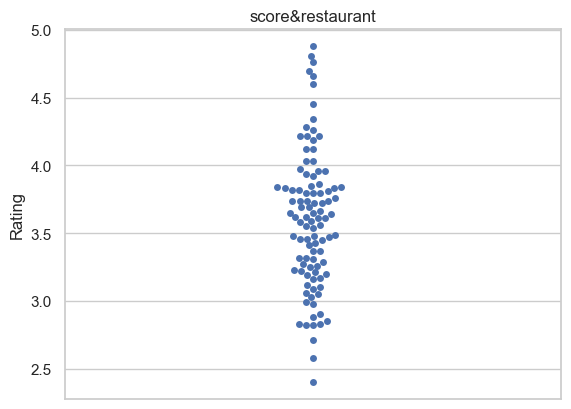

In [4]:
rating = []
reviews = []
restaurant = []
num = 0
# with open('Restaurant_reviews.csv', newline='', encoding='cp950', errors='ignore') as csvfile:
#     reader = csv.DictReader(csvfile)
#     df = pd.DataFrame(reader, columns=['restaurant', 'Rating'])

for index, row in df.iterrows():
    try:
        df.at[index, 'Rating'] = float(row['Rating'])
    except ValueError:
        df.drop(index, inplace=True)
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')
grouped_df = df.groupby('Restaurant', as_index=False)['Rating'].mean()
grouped_df['Rating'] = grouped_df['Rating'].round(2)
sns.set(style="whitegrid")
plt.title("score&restaurant")
ax = sns.swarmplot(data=grouped_df['Rating'])
#ax = sns.violinplot(data=grouped_df['Rating'])
plt.show()

In [5]:
df['Reviews_len']=df["Review"].apply(cal_word)
df['Reviews_Diversity']=df["Review"].apply(cal_1)
df['Reviews_emotion']=df["Review"].apply(emo)

In [6]:
df.head(5)

,Restaurant,Reviewer,Review,Rating,Time,Reviews_len,Reviews_Diversity,Reviews_emotion
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,5/25/2019 15:54,45,0.144144,0.9664
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,5/25/2019 14:20,31,0.208333,0.9360
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,5/24/2019 22:54,37,0.169312,0.9186
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,5/24/2019 22:11,32,0.195946,0.8591
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,5/24/2019 21:37,33,0.193750,0.9201


Text(0, 0.5, 'Rating')

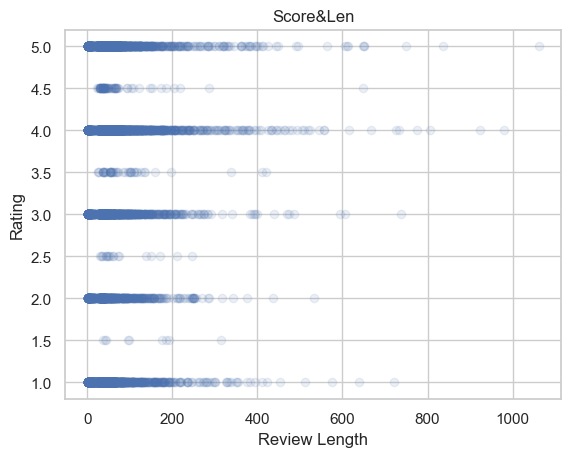

In [7]:
plt.scatter(df['Reviews_len'],df['Rating'], alpha=0.1)
plt.title("Score&Len")
plt.xlabel("Review Length")  # 設定X軸的標籤
plt.ylabel("Rating")

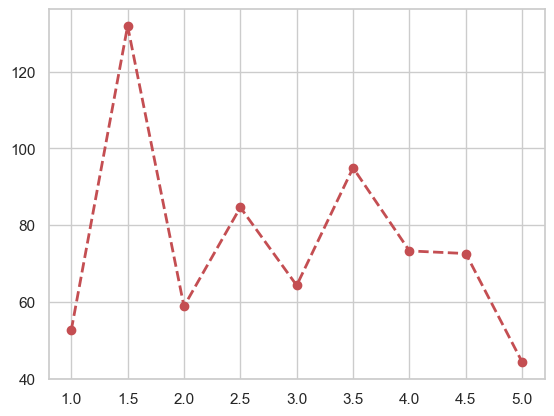

In [12]:
##字串長度繪圖
s5s=df.query('Rating == 5.0')['Reviews_len'].sum()
s5m=df.query('Rating == 5.0')['Reviews_len'].mean()

s4_5s=df.query('Rating == 4.5')['Reviews_len'].sum()
s4_5m=df.query('Rating == 4.5')['Reviews_len'].mean()

s4_0s=df.query('Rating == 4.0')['Reviews_len'].sum()
s4_0m=df.query('Rating == 4.0')['Reviews_len'].mean()

s3_5s=df.query('Rating == 3.5')['Reviews_len'].sum()
s3_5m=df.query('Rating == 3.5')['Reviews_len'].mean()

s3_0s=df.query('Rating == 3.0')['Reviews_len'].sum()
s3_0m=df.query('Rating == 3.0')['Reviews_len'].mean()

s2_5s=df.query('Rating == 2.5')['Reviews_len'].sum()
s2_5m=df.query('Rating == 2.5')['Reviews_len'].mean()

s2s=df.query('Rating == 2.0')['Reviews_len'].sum()
s2m=df.query('Rating == 2.0')['Reviews_len'].mean()

s1_5s=df.query('Rating == 1.5')['Reviews_len'].sum()
s1_5m=df.query('Rating == 1.5')['Reviews_len'].mean()

s1s=df.query('Rating == 1.0')['Reviews_len'].sum()
s1m=df.query('Rating == 1.0')['Reviews_len'].mean()

len_tolal=[s1s,s1_5s,s2s,s2_5s,s3_0s,s3_5s,s4_0s,s4_5s,s5s]
len_avg=[s1m,s1_5m,s2m,s2_5m,s3_0m,s3_5m,s4_0m,s4_5m,s5m]
score=[1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0]
plt.plot(score,len_avg, 'ro--', linewidth=2, markersize=6)
plt.show()

Text(0, 0.5, 'Rating')

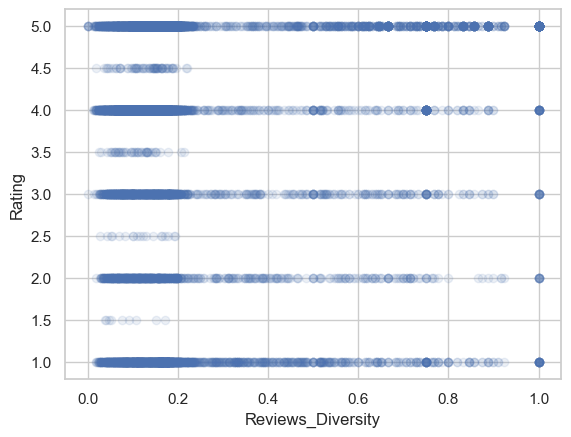

In [20]:
plt.scatter(df['Reviews_Diversity'],df['Rating'], alpha=0.1)
plt.xlabel("Reviews_Diversity")  # 設定X軸的標籤
plt.ylabel("Rating")

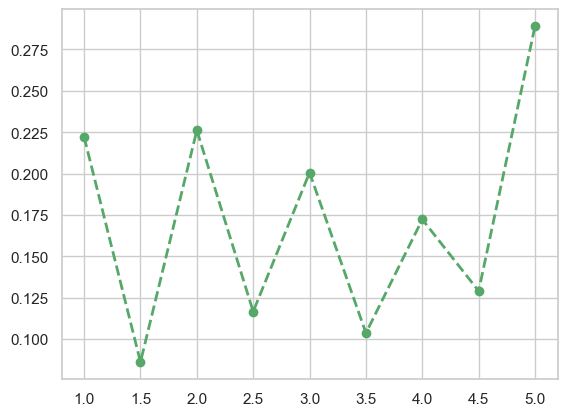

In [14]:
##語彙豐富度繪圖
s5m=df.query('Rating == 5.0')['Reviews_Diversity'].mean()
s4_5m=df.query('Rating == 4.5')['Reviews_Diversity'].mean()
s4_0m=df.query('Rating == 4.0')['Reviews_Diversity'].mean()
s3_5m=df.query('Rating == 3.5')['Reviews_Diversity'].mean()
s3_0m=df.query('Rating == 3.0')['Reviews_Diversity'].mean()
s2_5m=df.query('Rating == 2.5')['Reviews_Diversity'].mean()
s2m=df.query('Rating == 2.0')['Reviews_Diversity'].mean()
s1_5m=df.query('Rating == 1.5')['Reviews_Diversity'].mean()
s1m=df.query('Rating == 1.0')['Reviews_Diversity'].mean()
div_avg=[s1m,s1_5m,s2m,s2_5m,s3_0m,s3_5m,s4_0m,s4_5m,s5m]
score=[1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0]
plt.plot(score,div_avg,'go--', linewidth=2, markersize=6)
plt.show()

In [15]:
##情緒分析繪圖
s5s=df.query('Rating == 5.0')['Reviews_emotion'].sum()
s5m=df.query('Rating == 5.0')['Reviews_emotion'].mean()

s4_5s=df.query('Rating == 4.5')['Reviews_emotion'].sum()
s4_5m=df.query('Rating == 4.5')['Reviews_emotion'].mean()

s4_0s=df.query('Rating == 4.0')['Reviews_emotion'].sum()
s4_0m=df.query('Rating == 4.0')['Reviews_emotion'].mean()

s3_5s=df.query('Rating == 3.5')['Reviews_emotion'].sum()
s3_5m=df.query('Rating == 3.5')['Reviews_emotion'].mean()

s3_0s=df.query('Rating == 3.0')['Reviews_emotion'].sum()
s3_0m=df.query('Rating == 3.0')['Reviews_emotion'].mean()

s2_5s=df.query('Rating == 2.5')['Reviews_emotion'].sum()
s2_5m=df.query('Rating == 2.5')['Reviews_emotion'].mean()

s2s=df.query('Rating == 2.0')['Reviews_emotion'].sum()
s2m=df.query('Rating == 2.0')['Reviews_emotion'].mean()

s1_5s=df.query('Rating == 1.5')['Reviews_emotion'].sum()
s1_5m=df.query('Rating == 1.5')['Reviews_emotion'].mean()

s1s=df.query('Rating == 1.0')['Reviews_emotion'].sum()
s1m=df.query('Rating == 1.0')['Reviews_emotion'].mean()

emo_tolal=[s1s,s1_5s,s2s,s2_5s,s3_0s,s3_5s,s4_0s,s4_5s,s5s]
emo_avg=[s1m,s1_5m,s2m,s2_5m,s3_0m,s3_5m,s4_0m,s4_5m,s5m]
score=[1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0]


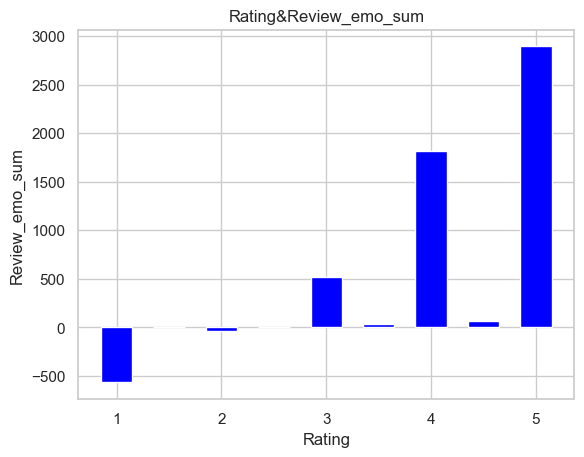

In [22]:
score=[1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0]
plt.bar(score, emo_tolal, width=0.3, color='blue')

# 添加標題和軸標籤
bar_positions = range(len(score))
plt.title('Rating&Review_emo_sum')
plt.xlabel('Rating')
plt.ylabel('Review_emo_sum')
bar_width = 0.3  # 調整長條的寬度
plt.show()

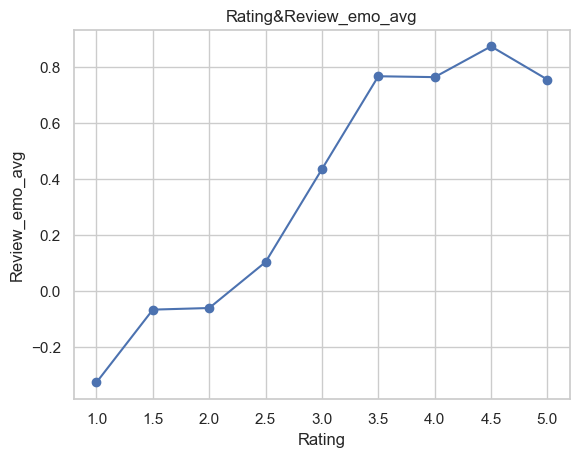

In [23]:
plt.plot(score, emo_avg, marker='o', linestyle='-')

# 添加標題和軸標籤
plt.title('Rating&Review_emo_avg')
plt.xlabel('Rating')
plt.ylabel('Review_emo_avg')

# 顯示圖形
plt.show()

In [24]:
wlist={}
##次數、總分、平均
for i in range(1,len(df)):
  try:
    tokens=word_tokenize(df['Review'][i])
    for token in tokens:
      if (token in wlist):
        wlist[token][0]+=1
        wlist[token][1]+=df['Rating'][i]
      else :
        wlist[token]=[1, df['Rating'][i]]
  except:
    pass
for i in wlist:
  wlist[i].append(wlist[i][1]/wlist[i][0])
sorted_wordlist = dict(sorted(wlist.items(), key=lambda x: x[1][2], reverse=True))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\cvb09\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


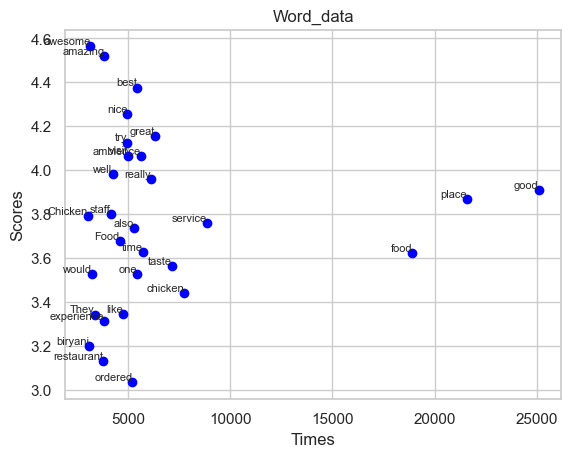

In [25]:
select_word={}
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
for i in wlist:
  if wlist[i][1]>3000 and i not in stop_words and i not in ['.','-','A','..',':',')','(',",","I","We",'This','...','!',"'s",'It'
  ,'’',"n't",'....',"The"]:
    select_word[i]=wlist[i]
word=[]
times=[]
Score=[]
for i in select_word:
  word.append(i)
  times.append(select_word[i][1])
  Score.append(select_word[i][2])
plt.scatter(times, Score, color='blue', marker='o')

# 在每個點上標記名詞
for i, noun in enumerate(word):
    plt.text(times[i], Score[i], noun, fontsize=8, ha='right', va='bottom')

# 添加標題和軸標籤
plt.title('Word_data')
plt.xlabel('Times')
plt.ylabel('Scores')

# 顯示圖形
plt.show()

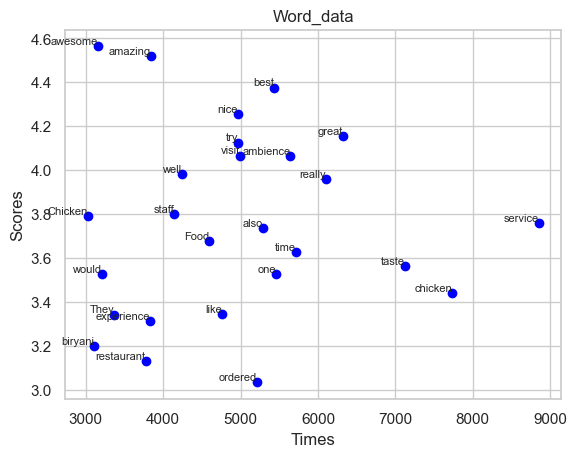

In [27]:
word=[]
times=[]
Score=[]
for i in select_word:
  if select_word[i][1]<10000:
    word.append(i)
    times.append(select_word[i][1])
    Score.append(select_word[i][2])
plt.scatter(times, Score, color='blue', marker='o')
# 在每個點上標記名詞
for i, noun in enumerate(word):
    plt.text(times[i], Score[i], noun, fontsize=8, ha='right', va='bottom')

# 添加標題和軸標籤
plt.title('Word_data')
plt.xlabel('Times')
plt.ylabel('Scores')

# 顯示圖形
plt.show()

In [42]:
##低分評論的文字雲
df_1_0=df.query('Rating == 1.0')
all_reviews = ' '.join(df_1_0['Review'].astype(str)) 
cloud = WordCloud().generate(all_reviews)
cloud.to_file('low_output.png')